In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv("Principal_Ports.csv")
df = pd.DataFrame(dt)

In [3]:
display(df.head(5))

,X,Y,OBJECTID,ID,PORT_NAME,IMPORTS,EXPORTS,DOMESTIC,SE_ANNO_CAD_DATA,PORT,TYPE,LATITUDE1,LONGITUDE1,RANK,TOTAL,FOREIGN_
0,-156.472800,20.898610,1,230,"Kahului, Maui, HI",38238,0,3054445,NaN,4410,C,20.89861,-156.47280,91,3092683,38238
1,-155.827966,20.035154,2,242,"Kawaihae, Hawai'i, HI",0,0,1969829,NaN,4405,C,20.03515,-155.82797,114,1969829,0
2,-159.352319,21.952484,3,334,"Nawiliwili, Kaua'i, HI",12726,0,1776755,NaN,4431,C,21.95248,-159.35232,122,1789481,12726
3,-158.113683,21.323066,4,235,"Kalaeloa Barbers Point, HI",4924376,155460,2411595,NaN,4458,C,21.32307,-158.11368,61,7491431,5079836
4,-157.871700,21.311110,5,199,"Honolulu, O'ahu, HI",619948,216976,11424582,NaN,4420,C,21.31111,-157.87170,45,12261506,836924


<AxesSubplot:>

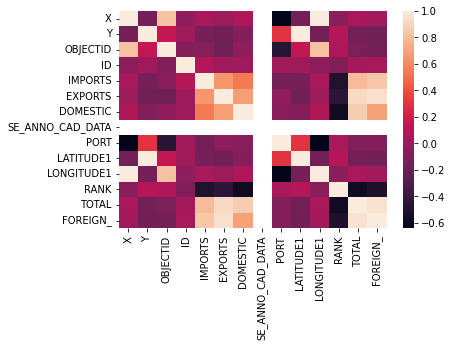

In [4]:
sns.heatmap(df.corr())

In [5]:
print(df.isnull().sum())

X                     0
Y                     0
OBJECTID              0
ID                    0
PORT_NAME             0
IMPORTS               0
EXPORTS               0
DOMESTIC              0
SE_ANNO_CAD_DATA    150
PORT                  0
TYPE                  0
LATITUDE1             0
LONGITUDE1            0
RANK                  0
TOTAL                 0
FOREIGN_              0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 150 non-null    float64
 1   Y                 150 non-null    float64
 2   OBJECTID          150 non-null    int64  
 3   ID                150 non-null    int64  
 4   PORT_NAME         150 non-null    object 
 5   IMPORTS           150 non-null    int64  
 6   EXPORTS           150 non-null    int64  
 7   DOMESTIC          150 non-null    int64  
 8   SE_ANNO_CAD_DATA  0 non-null      float64
 9   PORT              150 non-null    int64  
 10  TYPE              150 non-null    object 
 11  LATITUDE1         150 non-null    float64
 12  LONGITUDE1        150 non-null    float64
 13  RANK              150 non-null    int64  
 14  TOTAL             150 non-null    int64  
 15  FOREIGN_          150 non-null    int64  
dtypes: float64(5), int64(9), object(2)
memory us

In [7]:
df.describe()

,X,Y,OBJECTID,ID,IMPORTS,EXPORTS,DOMESTIC,SE_ANNO_CAD_DATA,PORT,LATITUDE1,LONGITUDE1,RANK,TOTAL,FOREIGN_
count,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,0.0,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02
mean,-95.315958,37.050398,75.500000,331.160000,3.953707e+06,5.340701e+06,7.574460e+06,NaN,2845.480000,37.050398,-95.315959,75.500000,1.686887e+07,9.294409e+06
std,22.370301,8.597946,43.445368,166.856732,9.602624e+06,1.680350e+07,1.372875e+07,NaN,1426.835517,8.597946,22.370301,43.445368,3.502437e+07,2.412868e+07
min,-166.549916,17.978613,1.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,112.000000,17.978610,-166.549920,1.000000,9.268340e+05,0.000000e+00
25%,-95.351445,30.329073,38.250000,193.250000,0.000000e+00,0.000000e+00,1.210985e+06,NaN,2221.000000,30.329075,-95.351445,38.250000,2.013456e+06,0.000000e+00
50%,-89.347485,37.832103,75.500000,336.000000,3.985675e+05,7.958700e+04,2.860754e+06,NaN,2371.500000,37.832105,-89.347485,75.500000,4.898266e+06,1.198764e+06
75%,-82.507350,41.953816,112.750000,460.750000,3.298922e+06,2.405637e+06,7.459992e+06,NaN,3903.250000,41.953815,-82.507350,112.750000,1.641004e+07,5.550863e+06
max,-65.836226,67.726766,150.000000,623.000000,6.835708e+07,1.397917e+08,1.123721e+08,NaN,7713.000000,67.726770,-65.836230,150.000000,2.759403e+08,1.967625e+08


<AxesSubplot:>

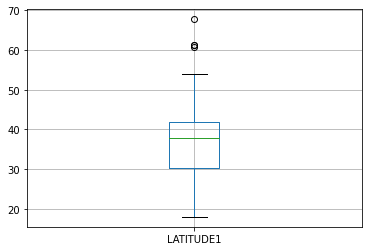

In [8]:
df.boxplot(column=['LATITUDE1'])

<AxesSubplot:>

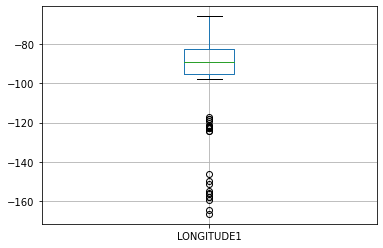

In [9]:
df.boxplot(column=['LONGITUDE1'])

<AxesSubplot:>

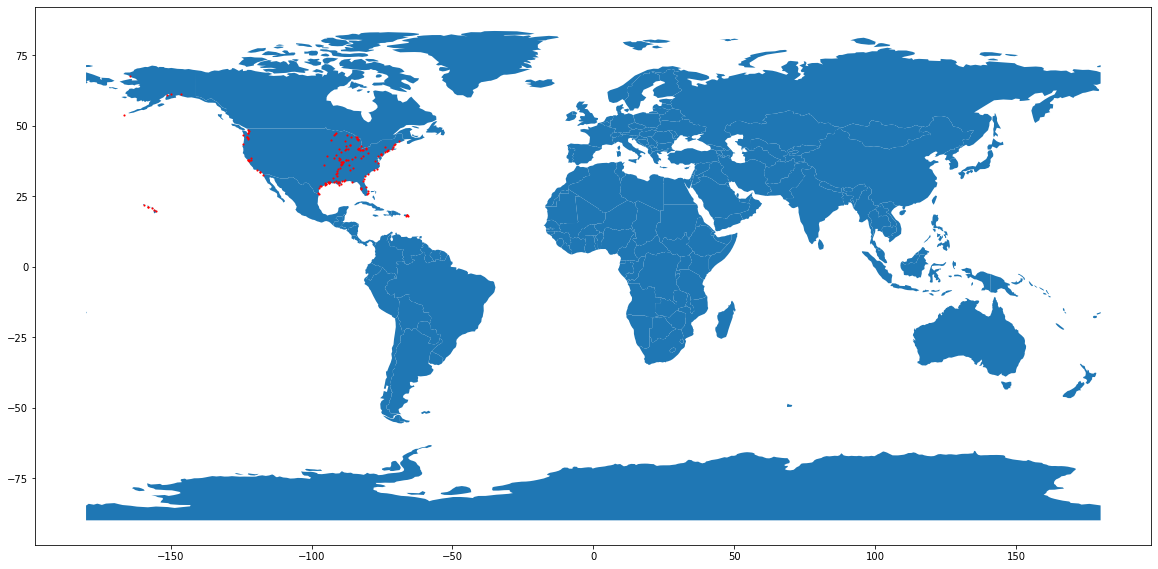

In [10]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['LONGITUDE1'], df['LATITUDE1'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 20)), marker='.', color='red', markersize=5)